In [1]:
import numpy as np
from matplotlib.pylab import *
from numpy import random
from collections import OrderedDict
import json

In [2]:
import json

Most of the plots reproduce the results from the main paper, so to have a 1:1 comparison between figures, with my data, when possible the code is obtained from https://github.com/uber-research/intrinsic-dimension 

In [3]:
def figsize(width,height):
    rcParams['figure.figsize'] = (width,height)

In [4]:
def plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=None, logx=False,xlim_v=None, ylim_v=None, saveas=None):
    plotfn = semilogx if logx else plot
    figsize(10, 5)
    #plt.rc('text', usetex=True)

    dir_perf = acc_mean[0]
    sub_perf = acc_mean[1:]
    
    if baseline!=None:
        dir_perf=baseline

    axhline(dir_perf, color=(0.0,0.0,0.0), ls='-', label='baseline')
    axhline(.9 * dir_perf, color=(0.0,0.0,0.0), ls='--', label='90% baseline')
    plotfn(unique_dim[1:], sub_perf, '-', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)    
    plotfn(unique_dim[1:], sub_perf, 'o', mec='b', lw=3, mfc=(.7,.7,1), color=(.7,.7,1), ms=14)
    plotfn(dim_solved_mean, acc_solved_mean, 'o', mec='b', lw=3, mfc='b', ms=14)
    
    errorbar(unique_dim[1:],  sub_perf,  yerr=acc_solved_std, color='b',  alpha=0.5, capsize=8, elinewidth=5, markersize=8, capthick=2)
    errorbar(dim_solved_mean,  acc_solved_mean,  xerr=dim_solved_std, color='r',  alpha=1.0, capsize=8, elinewidth=5, markersize=8, capthick=4)
    if xlim_v!=None:
        xlim(xlim_v)
    if ylim_v!=None:
        ylim(ylim_v)
    xlabel('Subspace dim $d$')
    ylabel('Validation accuracy')
    tight_layout()
    legend(loc=4)
    #if saveas:
    #    savefig('%s.png' % saveas)
    #    savefig('%s.pdf' % saveas)

In [5]:
def compt_dim_int(dat, baseline=None):
    #performance with intrinsic dimension 0 (direct) 
    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    #dimension and performance with intrinsic dimension > 0 (subspace)
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]

    if baseline!=None:
        dir_perf=baseline
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            break
    return unique_dim[i], perf_mean[i]

In [6]:
def format_data(data_btsp, baseline=1.0):
    print(data_btsp)
    data_btsp = np.array(data_btsp)
    print(data_btsp.shape)

    unique_dim = sorted(list(set(data_btsp[:,0])))
    print(unique_dim)

    # bootstrap M samples
    M = 100
    acc_btrp=[]
    for d in unique_dim:
        idx_ = np.where(data_btsp[:,0]==d)[0]
        rdm_seed = np.random.randint(1, size=M) #TODO: when you have data change this to 3 to have 3 different samples for id
        acc_btrp.append([ [d, data_btsp[ idx_[i], 1]] for i in rdm_seed  ])
    acc_btrp = np.array(acc_btrp)    
    print(acc_btrp.shape)

    d_int_array, acc_int_array = np.ones(M), np.ones(M)
    for m in range(M):
        d_int_, acc_int_ = compt_dim_int(acc_btrp[:,m,:], baseline=baseline)
        d_int_array[m], acc_int_array[m] = d_int_, acc_int_
        
    print(d_int_array)

    dim_solved_mean = np.mean(d_int_array)
    dim_solved_std = np.std(d_int_array)
    print("d_int: mean="+str(dim_solved_mean) + ", std=" +str( dim_solved_std) )

    acc_solved_mean = np.mean(acc_int_array)
    acc_solved_std = np.std(acc_int_array)
    print("d_int: mean="+str(acc_solved_mean) + ", std=" +str( acc_solved_std) )

    acc_mean = np.mean(acc_btrp[:,:,1], axis=1)
    acc_std = np.std(acc_btrp[:,:,1], axis=1)
    return unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std

# MNIST Results

In [7]:
# MNIST global baseline
BASELINE = 1.0

## Fully Connected - Global Baseline

In [8]:
with open('results_fc200.json') as f:
    data = json.load(f)
f.close()

data_fcn200 = [] # 0 is the dimension of the full space and 100 is the local baseline accuracy
for k,v in data.items():
    data_fcn200.append([v['intrinsic_dimension'],v['best_accuracy']])

[[100, 0.5833], [200, 0.7451], [300, 0.8231], [400, 0.8636], [500, 0.8832], [600, 0.902], [700, 0.9004], [650, 0.8973], [675, 0.9002], [625, 0.8982], [800, 0.9137], [900, 0.9239], [1000, 0.9282], [1100, 0.9286], [1200, 0.9339], [1300, 0.9346], [525, 0.8862], [550, 0.889], [575, 0.8935], [0, 0.9817], [50, 0.4863], [10, 0.2289]]
(22, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 525.0, 550.0, 575.0, 600.0, 625.0, 650.0, 675.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]
(22, 100, 2)
[600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600.
 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600. 600

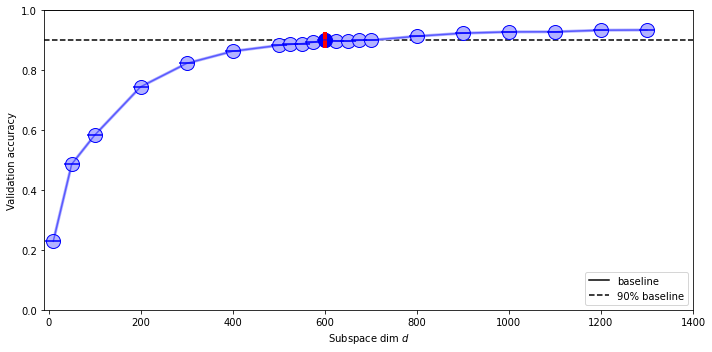

In [9]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn200)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-10,1400], ylim_v=[0.0, 1.0], saveas='')

## Fully Connected - Local Baseline

[[100, 0.5833], [200, 0.7451], [300, 0.8231], [400, 0.8636], [500, 0.8832], [600, 0.902], [700, 0.9004], [650, 0.8973], [675, 0.9002], [625, 0.8982], [800, 0.9137], [900, 0.9239], [1000, 0.9282], [1100, 0.9286], [1200, 0.9339], [1300, 0.9346], [525, 0.8862], [550, 0.889], [575, 0.8935], [0, 0.9817], [50, 0.4863], [10, 0.2289]]
(22, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 525.0, 550.0, 575.0, 600.0, 625.0, 650.0, 675.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]
(22, 100, 2)
[525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525.
 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525.
 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525.
 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525.
 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525.
 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525.
 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525. 525

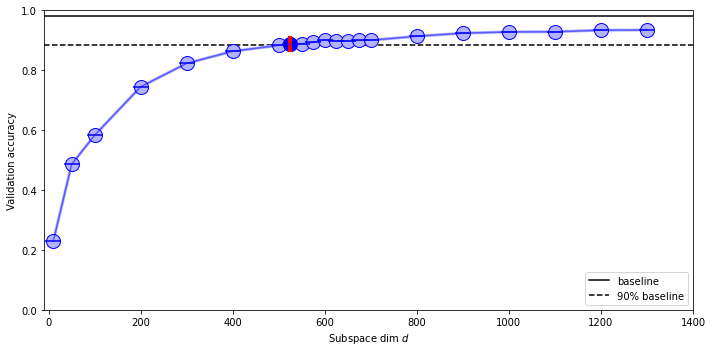

In [10]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn200, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std, logx=False,xlim_v=[-10,1400], ylim_v=[0.0, 1.0], saveas='')

## LeNet - Global Baseline 

In [11]:
with open('results/lenet/results_lenet_mnist.json') as f:
    data = json.load(f)
f.close()

data_lenet_mnist = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_lenet_mnist.append([v['intrinsic_dimension'],v['best_accuracy']])

[[10, 0.2362], [50, 0.6189], [100, 0.811], [200, 0.9228], [300, 0.9387], [500, 0.9656], [1000, 0.9764], [150, 0.8792], [400, 0.9523], [125, 0.8486], [175, 0.901], [225, 0.9295], [250, 0.9281], [275, 0.9351], [185, 0.8953], [190, 0.8937], [195, 0.9106], [205, 0.9057], [210, 0.9075], [0, 0.9892], [170, 0.9028], [165, 0.8901], [160, 0.8903], [180, 0.8931]]
(24, 2)
[0.0, 10.0, 50.0, 100.0, 125.0, 150.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 225.0, 250.0, 275.0, 300.0, 400.0, 500.0, 1000.0]
(24, 100, 2)
[170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170. 170.
 170. 170. 170. 170. 170. 170. 

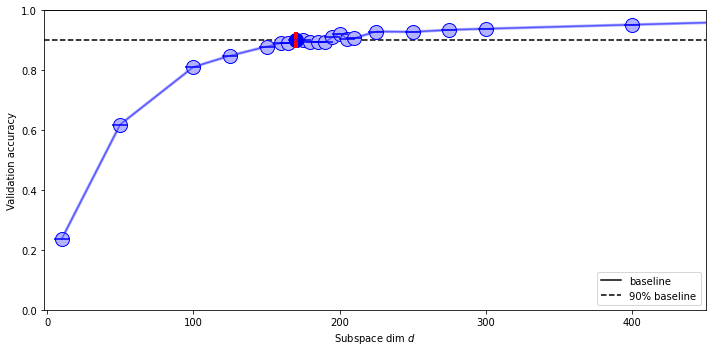

In [12]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_mnist)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-2,450], ylim_v=[0.0,1.0], saveas='')

## LeNet - Local Baseline 

[[10, 0.2362], [50, 0.6189], [100, 0.811], [200, 0.9228], [300, 0.9387], [500, 0.9656], [1000, 0.9764], [150, 0.8792], [400, 0.9523], [125, 0.8486], [175, 0.901], [225, 0.9295], [250, 0.9281], [275, 0.9351], [185, 0.8953], [190, 0.8937], [195, 0.9106], [205, 0.9057], [210, 0.9075], [0, 0.9892], [170, 0.9028], [165, 0.8901], [160, 0.8903], [180, 0.8931]]
(24, 2)
[0.0, 10.0, 50.0, 100.0, 125.0, 150.0, 160.0, 165.0, 170.0, 175.0, 180.0, 185.0, 190.0, 195.0, 200.0, 205.0, 210.0, 225.0, 250.0, 275.0, 300.0, 400.0, 500.0, 1000.0]
(24, 100, 2)
[160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160. 160.
 160. 160. 160. 160. 160. 160. 

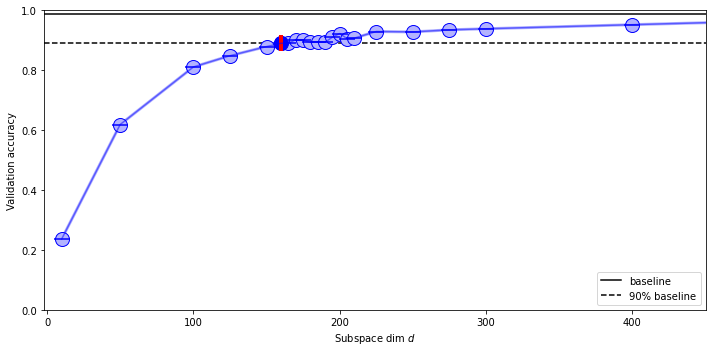

In [13]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_mnist, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-2,450], ylim_v=[0.0,1.0], saveas='')

## Untied LeNet - Global Baseline

In [14]:
with open('results/untied_lenet/results_untied_lenet_mnist.json') as f:
    data = json.load(f)
f.close()

data_untied_lenet = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_untied_lenet.append([v['intrinsic_dimension'],v['best_accuracy']])

[[100, 0.7273], [200, 0.8412], [300, 0.8769], [400, 0.9077], [500, 0.916], [600, 0.9303], [700, 0.9376], [800, 0.9387], [900, 0.9431], [1000, 0.9463], [1100, 0.9524], [1200, 0.9498], [1300, 0.9563], [0, 0.9868], [50, 0.527], [10, 0.1758], [350, 0.9003], [450, 0.9142]]
(18, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 350.0, 400.0, 450.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]
(18, 100, 2)
[350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350.]
d_int: mean=350.0, std=0.0
d_int: mean=0.9002999999999999, std=1.110223024

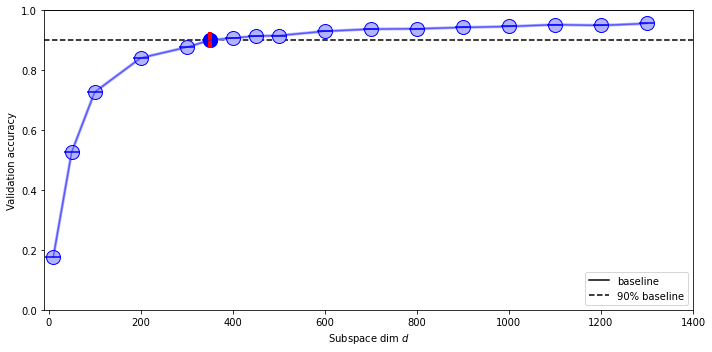

In [15]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_untied_lenet)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False, xlim_v=[-10,1400], ylim_v=[0.0,1.0], saveas='')

## Untied LeNet - Local Baseline

[[100, 0.7273], [200, 0.8412], [300, 0.8769], [400, 0.9077], [500, 0.916], [600, 0.9303], [700, 0.9376], [800, 0.9387], [900, 0.9431], [1000, 0.9463], [1100, 0.9524], [1200, 0.9498], [1300, 0.9563], [0, 0.9868], [50, 0.527], [10, 0.1758], [350, 0.9003], [450, 0.9142]]
(18, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 350.0, 400.0, 450.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0]
(18, 100, 2)
[350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350. 350.
 350. 350.]
d_int: mean=350.0, std=0.0
d_int: mean=0.9002999999999999, std=1.110223024

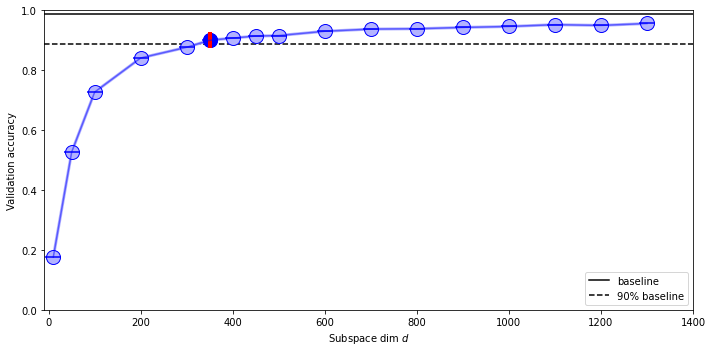

In [16]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_untied_lenet, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False, xlim_v=[-10,1400], ylim_v=[0.0,1.0], saveas='')

## FC LeNet - Global Baseline

In [17]:
with open('results/fc_lenet/results_fc_lenet_mnist.json') as f:
    data = json.load(f)
f.close()

data_fc_lenet = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_fc_lenet.append([v['intrinsic_dimension'],v['best_accuracy']])

[[400, 0.8323], [600, 0.8781], [800, 0.8815], [1000, 0.9037], [0, 0.9772], [10, 0.114], [200, 0.4067], [900, 0.9049], [1100, 0.9042], [300, 0.7605], [1200, 0.9116], [250, 0.6846], [1400, 0.9159], [50, 0.1135], [100, 0.1823]]
(15, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 250.0, 300.0, 400.0, 600.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1400.0]
(15, 100, 2)
[900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900. 900.
 900. 900.]
d_int: mean=900.0, std=0.0
d_int: mean=0.9048999999999997, std=3.3306690738754696e-16


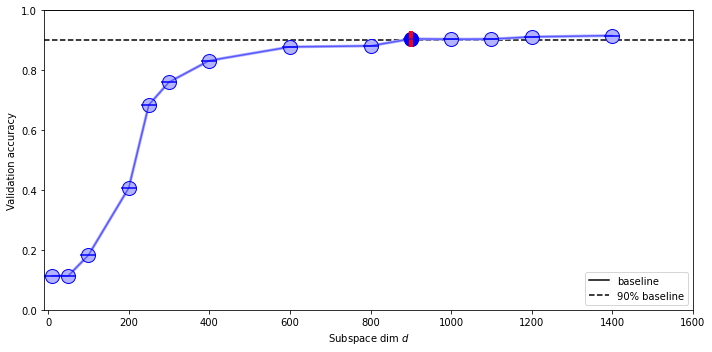

In [18]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_lenet)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-10,1600], ylim_v=[0,1.0], saveas='')

## FC LeNet - Local Baseline

[[400, 0.8323], [600, 0.8781], [800, 0.8815], [1000, 0.9037], [0, 0.9772], [10, 0.114], [200, 0.4067], [900, 0.9049], [1100, 0.9042], [300, 0.7605], [1200, 0.9116], [250, 0.6846], [1400, 0.9159], [50, 0.1135], [100, 0.1823]]
(15, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 250.0, 300.0, 400.0, 600.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1400.0]
(15, 100, 2)
[800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800. 800.
 800. 800.]
d_int: mean=800.0, std=0.0
d_int: mean=0.8815000000000001, std=1.1102230246251565e-16


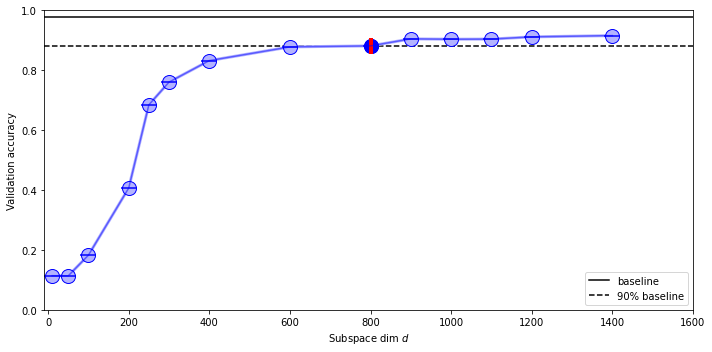

In [19]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_lenet, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-10,1600], ylim_v=[0,1.0], saveas='')

## FC Tied LeNet - Global Baseline

In [20]:
with open('results/fc_tied_lenet/results_fc_tied_lenet_mnist.json') as f:
    data = json.load(f)
f.close()

data_fc_tied_lenet = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_fc_tied_lenet.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.989], [10, 0.2285], [50, 0.5198], [100, 0.6856], [200, 0.8362], [300, 0.882], [400, 0.9036], [500, 0.9207], [600, 0.9348], [700, 0.9375], [800, 0.9456], [900, 0.9476], [1000, 0.9516], [1100, 0.9563], [1200, 0.9565], [1300, 0.9578], [1400, 0.9606]]
(17, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0]
(17, 100, 2)
[400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400.]
d_int: mean=400.0, std=0.0
d_int: mean=0.9036000000000002, std=2.220446049250313e-16


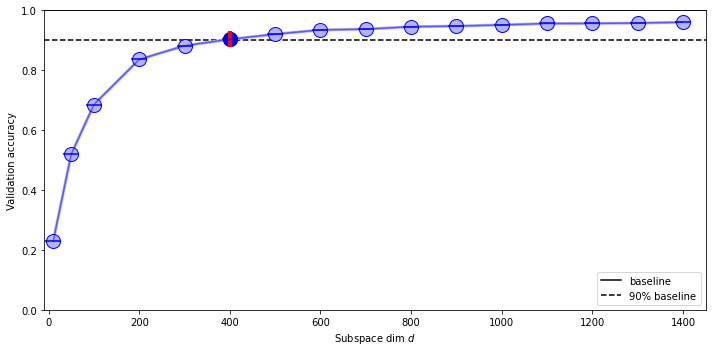

In [21]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_tied_lenet)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-10,1450], ylim_v=[0,1.0], saveas='')

## FC Tied LeNet - Local Baseline

[[0, 0.989], [10, 0.2285], [50, 0.5198], [100, 0.6856], [200, 0.8362], [300, 0.882], [400, 0.9036], [500, 0.9207], [600, 0.9348], [700, 0.9375], [800, 0.9456], [900, 0.9476], [1000, 0.9516], [1100, 0.9563], [1200, 0.9565], [1300, 0.9578], [1400, 0.9606]]
(17, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0]
(17, 100, 2)
[400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400. 400.
 400. 400.]
d_int: mean=400.0, std=0.0
d_int: mean=0.9036000000000002, std=2.220446049250313e-16


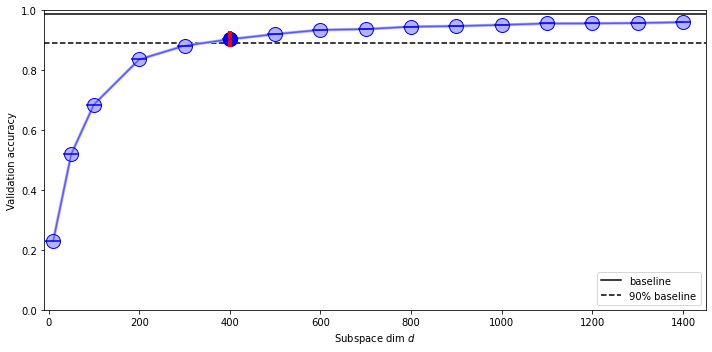

In [22]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_tied_lenet, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-10,1450], ylim_v=[0,1.0], saveas='')

# CIFAR10

In [23]:
# CIFAR10 global baseline
BASELINE = 0.50 # to have a dint90 at 45% in appendix S10 #0.58 to have a dint90 at 52.5% in appendix S8

## Fully Connected - Global Baseline

In [73]:
with open('results/fcn/results_fcn_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fcn_cifar10 = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" not in k:
        data_fcn_cifar10.append([v['intrinsic_dimension'],v['best_accuracy']])

[[15000, 0.4955], [50, 0.1687], [100, 0.2716], [1000, 0.3967], [5000, 0.4668], [10000, 0.4919], [0, 0.5317]]
(7, 2)
[0.0, 50.0, 100.0, 1000.0, 5000.0, 10000.0, 15000.0]
(7, 100, 2)
[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000.]
d_int: mean=5000.0, std=0.0
d_int: mean=0.4668, std=0.0


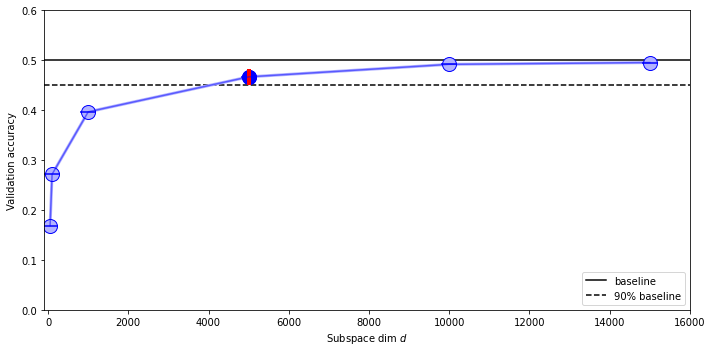

In [74]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn_cifar10, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-100,16000], ylim_v=[0,0.6], saveas='')

## Fully Connected - Local Baseline

[[15000, 0.4955], [50, 0.1687], [100, 0.2716], [1000, 0.3967], [5000, 0.4668], [10000, 0.4919], [0, 0.5317]]
(7, 2)
[0.0, 50.0, 100.0, 1000.0, 5000.0, 10000.0, 15000.0]
(7, 100, 2)
[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
d_int: mean=10000.0, std=0.0
d_int: mean=0.49190000000000017, std=1.6653345369377348e-16


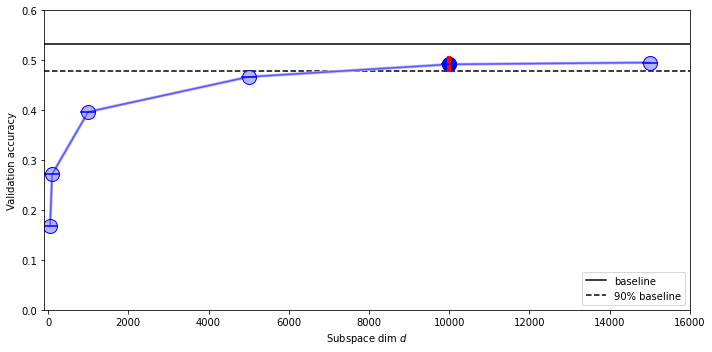

In [75]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn_cifar10, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-100,16000], ylim_v=[0,0.6], saveas='')

## Fully Connected - FastJL

In [82]:
with open('results/fcn/results_fcn_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fcn_fastjl_cifar10 = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" in k or v['intrinsic_dimension'] == 0:
        data_fcn_fastjl_cifar10.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.5317], [15000, 0.4204], [50, 0.1], [100, 0.1], [1000, 0.1375]]
(5, 2)
[0.0, 50.0, 100.0, 1000.0, 15000.0]
(5, 100, 2)
[15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.]
d_int: mean=15000.0, std=0.0
d_int: mean=0.4204, std=0.0


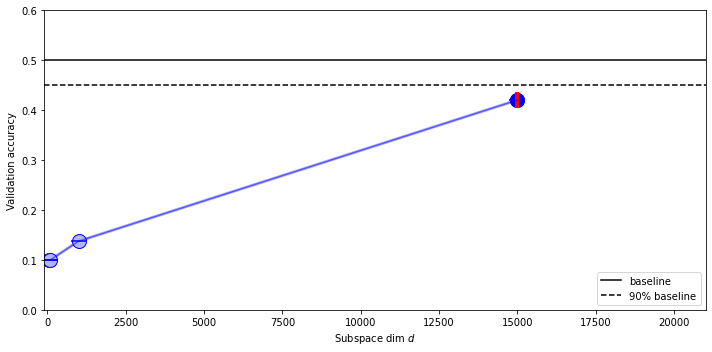

In [83]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fcn_fastjl_cifar10, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-100,21000], ylim_v=[0,0.6], saveas='')

## LeNet - Global Baseline

In [29]:
with open('results/lenet/results_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_lenet_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" not in k:
        data_lenet_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[50, 0.239], [100, 0.2909], [200, 0.3607], [300, 0.3868], [400, 0.4212], [500, 0.4295], [600, 0.451], [700, 0.4562], [800, 0.4578], [900, 0.4694], [1000, 0.4733], [1100, 0.4861], [1200, 0.5069], [1300, 0.4913], [1400, 0.499], [1500, 0.5073], [1600, 0.5103], [1700, 0.518], [1800, 0.4972], [1900, 0.503], [2000, 0.5155], [2100, 0.5364], [2200, 0.5193], [2300, 0.5331], [2400, 0.5207], [2500, 0.5252], [2600, 0.5418], [2700, 0.5325], [2800, 0.5316], [2900, 0.5414], [3000, 0.551], [3100, 0.5355], [3200, 0.5499], [3300, 0.5409], [3400, 0.5276], [3500, 0.5289], [3600, 0.5488], [3700, 0.5599], [3800, 0.5539], [3900, 0.544], [4000, 0.5425], [4100, 0.5562], [4200, 0.5434], [4300, 0.5518], [4400, 0.5578], [4500, 0.5553], [0, 0.5725], [10, 0.1024]]
(48, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.

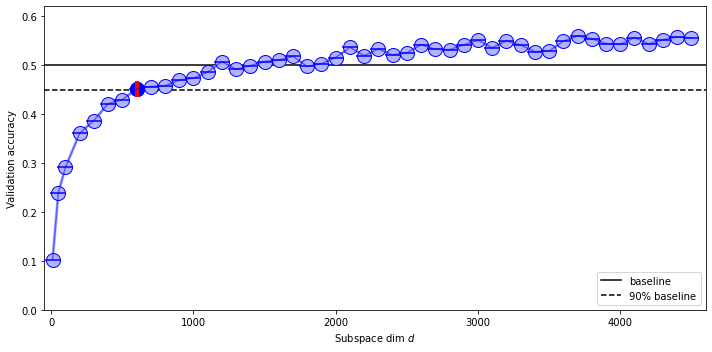

In [30]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-50,4600], ylim_v=[0,0.62], saveas='')

## LeNet - Local Baseline

[[50, 0.239], [100, 0.2909], [200, 0.3607], [300, 0.3868], [400, 0.4212], [500, 0.4295], [600, 0.451], [700, 0.4562], [800, 0.4578], [900, 0.4694], [1000, 0.4733], [1100, 0.4861], [1200, 0.5069], [1300, 0.4913], [1400, 0.499], [1500, 0.5073], [1600, 0.5103], [1700, 0.518], [1800, 0.4972], [1900, 0.503], [2000, 0.5155], [2100, 0.5364], [2200, 0.5193], [2300, 0.5331], [2400, 0.5207], [2500, 0.5252], [2600, 0.5418], [2700, 0.5325], [2800, 0.5316], [2900, 0.5414], [3000, 0.551], [3100, 0.5355], [3200, 0.5499], [3300, 0.5409], [3400, 0.5276], [3500, 0.5289], [3600, 0.5488], [3700, 0.5599], [3800, 0.5539], [3900, 0.544], [4000, 0.5425], [4100, 0.5562], [4200, 0.5434], [4300, 0.5518], [4400, 0.5578], [4500, 0.5553], [0, 0.5725], [10, 0.1024]]
(48, 2)
[0.0, 10.0, 50.0, 100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0, 800.0, 900.0, 1000.0, 1100.0, 1200.0, 1300.0, 1400.0, 1500.0, 1600.0, 1700.0, 1800.0, 1900.0, 2000.0, 2100.0, 2200.0, 2300.0, 2400.0, 2500.0, 2600.0, 2700.0, 2800.0, 2900.0, 3000.

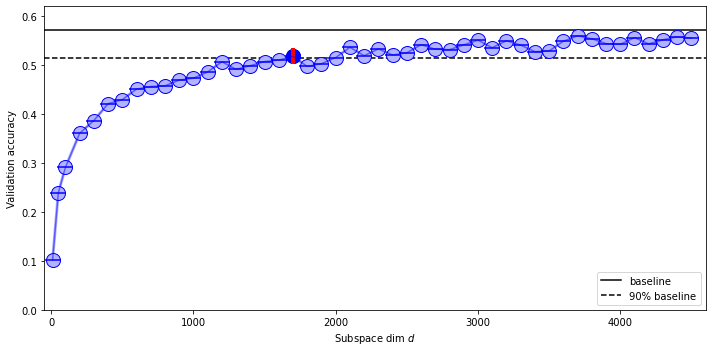

In [31]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_cifar, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-50,4600], ylim_v=[0,0.62], saveas='')

## LeNet - FastJL

In [32]:
with open('results/lenet/results_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_lenet_fastjl_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" in k or v['intrinsic_dimension'] == 0:
        data_lenet_fastjl_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.5725], [1000, 0.4406], [500, 0.4048], [2500, 0.5028], [2000, 0.492], [1500, 0.4889], [750, 0.426], [200, 0.1463], [100, 0.1003], [10, 0.1003]]
(10, 2)
[0.0, 10.0, 100.0, 200.0, 500.0, 750.0, 1000.0, 1500.0, 2000.0, 2500.0]
(10, 100, 2)
[1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500. 1500.
 1500. 1500. 1500. 1500.]
d_int: mean=1500.0, std=0.0
d_int: mean=0.48890000000000006, std=5.551115123125783e-17


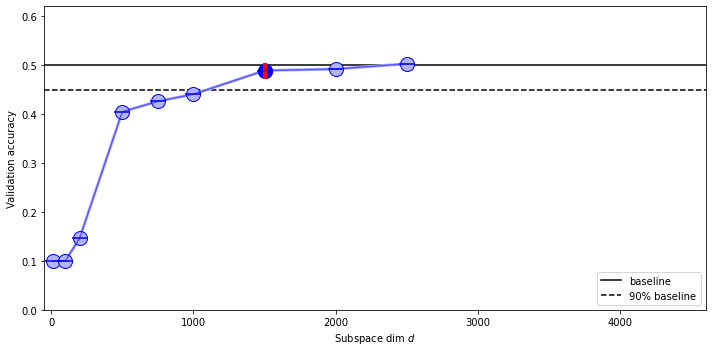

In [33]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_lenet_fastjl_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-50,4600], ylim_v=[0,0.62], saveas='')

## Untied LeNet - Global Baseline

In [34]:
with open('results/untied_lenet/results_untied_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_untied_lenet_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" not in k:
        data_untied_lenet_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.5984], [10000, 0.4639], [15000, 0.4827], [20000, 0.5], [25000, 0.5022], [12500, 0.48], [5000, 0.4042], [2000, 0.1], [1000, 0.1], [100, 0.1], [10, 0.1], [7000, 0.4251], [500, 0.1], [0, 0.1], [30000, 0.5068], [35000, 0.5198], [40000, 0.5178]]
(17, 2)
[0.0, 10.0, 100.0, 500.0, 1000.0, 2000.0, 5000.0, 7000.0, 10000.0, 12500.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0]
(16, 100, 2)
[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 1000

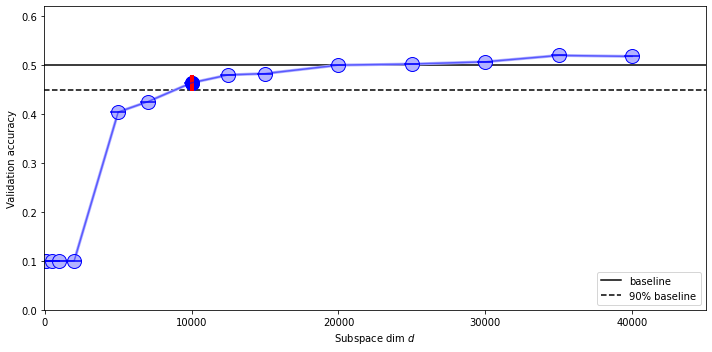

In [35]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_untied_lenet_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-50,45000], ylim_v=[0,0.62], saveas='')

## Untied LeNet - Local Baseline

[[0, 0.5984], [10000, 0.4639], [15000, 0.4827], [20000, 0.5], [25000, 0.5022], [12500, 0.48], [5000, 0.4042], [2000, 0.1], [1000, 0.1], [100, 0.1], [10, 0.1], [7000, 0.4251], [500, 0.1], [0, 0.1], [30000, 0.5068], [35000, 0.5198], [40000, 0.5178]]
(17, 2)
[0.0, 10.0, 100.0, 500.0, 1000.0, 2000.0, 5000.0, 7000.0, 10000.0, 12500.0, 15000.0, 20000.0, 25000.0, 30000.0, 35000.0, 40000.0]
(16, 100, 2)
[40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000. 40000.
 40000. 40000. 40000. 40000. 4000

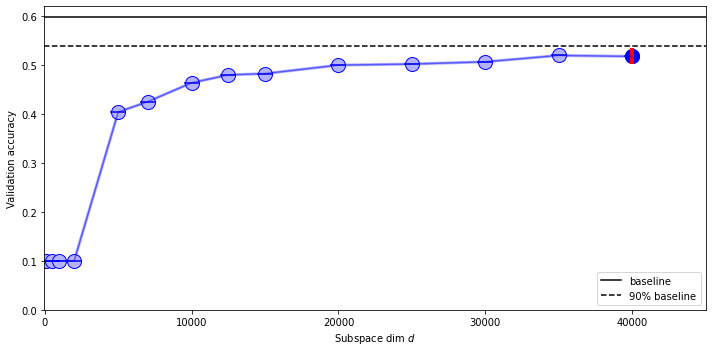

In [36]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_untied_lenet_cifar, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-50,45000], ylim_v=[0,0.62], saveas='')

## Untied LeNet - FastJL

In [37]:
with open('results/untied_lenet/results_untied_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_untied_lenet_fastjl_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" in k or v['intrinsic_dimension'] == 0:
        data_untied_lenet_fastjl_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.5984], [0, 0.1], [35000, 0.5575], [50000, 0.5544], [20000, 0.5399], [10000, 0.5249], [5000, 0.5023], [2000, 0.455], [1000, 0.4163], [500, 0.1564], [100, 0.1]]
(11, 2)
[0.0, 100.0, 500.0, 1000.0, 2000.0, 5000.0, 10000.0, 20000.0, 35000.0, 50000.0]
(10, 100, 2)
[2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000. 2000.
 2000. 2000. 2000. 2000.]
d_int: mean=2000.0, std=0.0
d_int: mean=0.4549999999999999, std=1.1102230246251565e-16


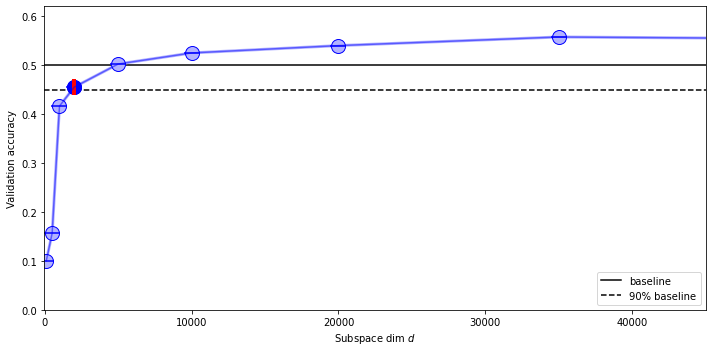

In [38]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_untied_lenet_fastjl_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-50,45000], ylim_v=[0,0.62], saveas='')

## FC LeNet - Gobal Baseline

In [39]:
with open('results/fc_lenet/results_fc_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fc_lenet_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" not in k:
        data_fc_lenet_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.5516], [5000, 0.4513], [10, 0.1165], [500, 0.3628], [1000, 0.3966], [2000, 0.4221], [30000, 0.5024], [15000, 0.4891], [27000, 0.5005], [45000, 0.5069], [35000, 0.5006], [70000, 0.516], [55000, 0.5106], [50000, 0.5127]]
(14, 2)
[0.0, 10.0, 500.0, 1000.0, 2000.0, 5000.0, 15000.0, 27000.0, 30000.0, 35000.0, 45000.0, 50000.0, 55000.0, 70000.0]
(14, 100, 2)
[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.
 5000. 5000. 5000. 5000.]
d_int: mean=5000.0, std=0.0


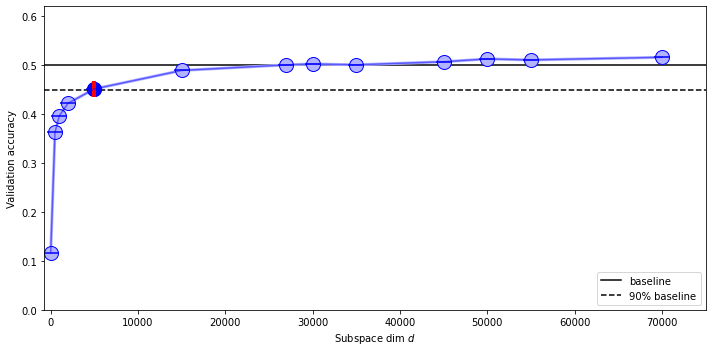

In [40]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_lenet_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-750,75000], ylim_v=[0,0.62], saveas='')

## FC LeNet - Local Baseline

[[0, 0.5516], [5000, 0.4513], [10, 0.1165], [500, 0.3628], [1000, 0.3966], [2000, 0.4221], [30000, 0.5024], [15000, 0.4891], [27000, 0.5005], [45000, 0.5069], [35000, 0.5006], [70000, 0.516], [55000, 0.5106], [50000, 0.5127]]
(14, 2)
[0.0, 10.0, 500.0, 1000.0, 2000.0, 5000.0, 15000.0, 27000.0, 30000.0, 35000.0, 45000.0, 50000.0, 55000.0, 70000.0]
(14, 100, 2)
[27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.
 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000. 27000.

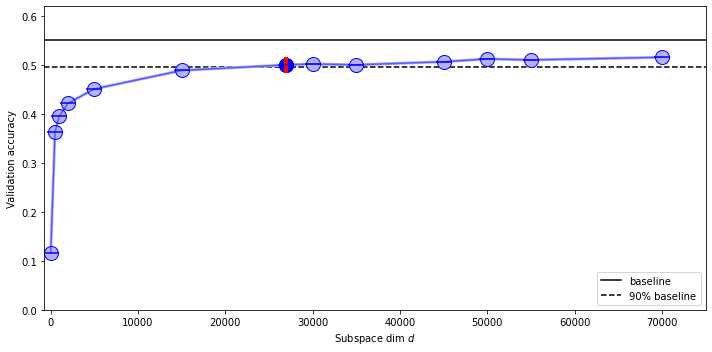

In [41]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_lenet_cifar, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-750,75000], ylim_v=[0,0.62], saveas='')

## FC LeNet - FastJL

In [42]:
with open('results/fc_lenet/results_fc_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fc_lenet_fastjl_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" in k or v['intrinsic_dimension'] == 0:
        data_fc_lenet_fastjl_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.5516], [35000, 0.4764], [50000, 0.4822], [20000, 0.4704], [10000, 0.4522], [5000, 0.4423], [2000, 0.4163], [1000, 0.4018], [500, 0.3732], [100, 0.1]]
(10, 2)
[0.0, 100.0, 500.0, 1000.0, 2000.0, 5000.0, 10000.0, 20000.0, 35000.0, 50000.0]
(10, 100, 2)
[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.
 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
d_int: mean=10000.0, std=0.0
d_

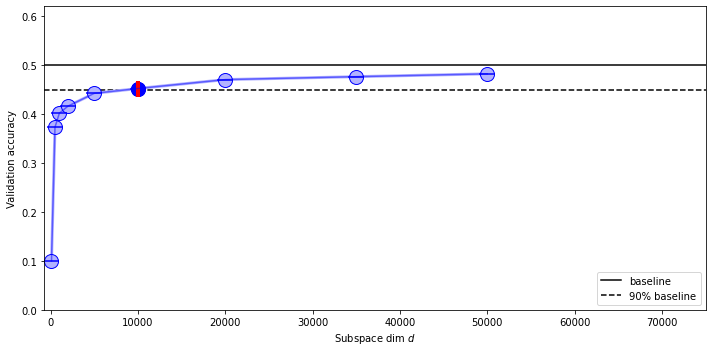

In [43]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_lenet_fastjl_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-750,75000], ylim_v=[0,0.62], saveas='')

## FC Tied LeNet - Global Baseline

In [44]:
with open('results/fc_tied_lenet/results_fc_tied_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fc_tied_lenet_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" not in k:
        data_fc_tied_lenet_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[10, 0.1503], [0, 0.562], [100, 0.2674], [500, 0.3736], [1000, 0.42], [2000, 0.4441], [3000, 0.4591], [4000, 0.4723], [4000, 0.4775], [5000, 0.4928], [6000, 0.5027], [7000, 0.5019], [8000, 0.5094], [9000, 0.5127], [10000, 0.5197], [11000, 0.5214], [12000, 0.5226], [10, 0.1408], [100, 0.1513], [500, 0.3559], [1000, 0.4072], [2000, 0.4507], [15000, 0.5346], [0, 0.505]]
(24, 2)
[0.0, 10.0, 100.0, 500.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0, 12000.0, 15000.0]
(17, 100, 2)
[3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000.
 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000.
 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000.
 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000.
 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000.
 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000. 3000.
 3000. 3000. 3000. 3000. 3000. 3000.

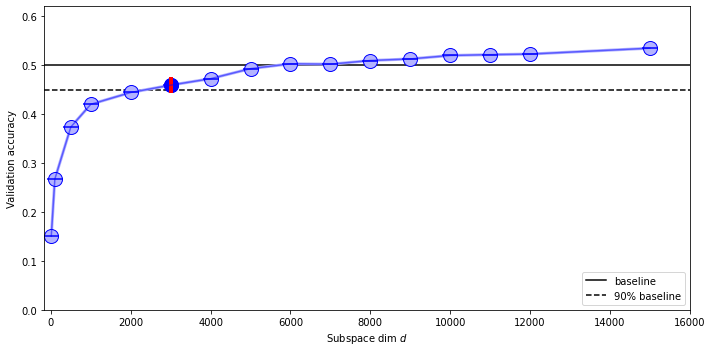

In [45]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_tied_lenet_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-170,16000], ylim_v=[0,0.62], saveas='')

## FC Tied LeNet - Local Baseline

[[10, 0.1503], [0, 0.562], [100, 0.2674], [500, 0.3736], [1000, 0.42], [2000, 0.4441], [3000, 0.4591], [4000, 0.4723], [4000, 0.4775], [5000, 0.4928], [6000, 0.5027], [7000, 0.5019], [8000, 0.5094], [9000, 0.5127], [10000, 0.5197], [11000, 0.5214], [12000, 0.5226], [10, 0.1408], [100, 0.1513], [500, 0.3559], [1000, 0.4072], [2000, 0.4507], [15000, 0.5346], [0, 0.505]]
(24, 2)
[0.0, 10.0, 100.0, 500.0, 1000.0, 2000.0, 3000.0, 4000.0, 5000.0, 6000.0, 7000.0, 8000.0, 9000.0, 10000.0, 11000.0, 12000.0, 15000.0]
(17, 100, 2)
[8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000. 8000.
 8000. 8000. 8000. 8000. 8000. 8000.

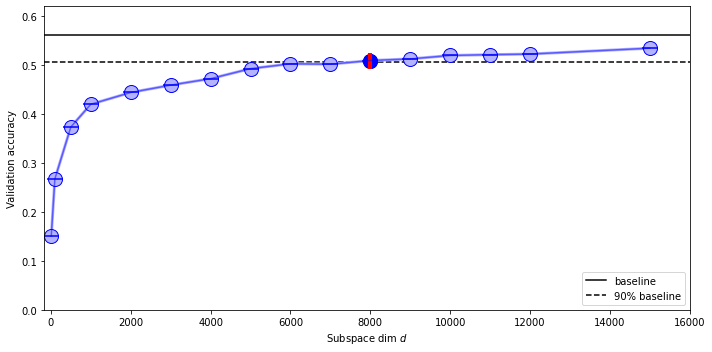

In [46]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_tied_lenet_cifar, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-170,16000], ylim_v=[0,0.62], saveas='')

## FC Tied LeNet - FastJL

In [47]:
with open('results/fc_tied_lenet/results_fc_tied_lenet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_fc_tied_lenet_fastjl_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" in k or v['intrinsic_dimension'] == 0:
        data_fc_tied_lenet_fastjl_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.562], [0, 0.505], [10000, 0.196], [5000, 0.1802], [15000, 0.4736], [11000, 0.1974], [12000, 0.188], [10, 0.1], [100, 0.1], [500, 0.1], [1000, 0.1005], [2000, 0.1479], [20000, 0.2069], [8000, 0.1932]]
(14, 2)
[0.0, 10.0, 100.0, 500.0, 1000.0, 2000.0, 5000.0, 8000.0, 10000.0, 11000.0, 12000.0, 15000.0, 20000.0]
(13, 100, 2)
[15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000. 15000.
 15000. 15000. 15000. 15000. 1

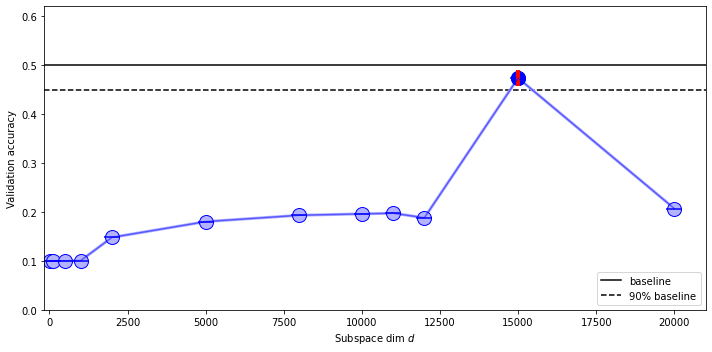

In [78]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_fc_tied_lenet_fastjl_cifar, baseline=BASELINE)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE, logx=False,xlim_v=[-170,21000], ylim_v=[0,0.62], saveas='')

## ResNet - Global Baseline

In [49]:
BASELINE_RESNET = 0.58

In [50]:
with open('results/resnet/results_resnet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_resnet_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" not in k:
        data_resnet_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[100, 0.3198], [1000, 0.5571], [0, 0.825], [10, 0.1609], [10000, 0.7361], [0, 0.7564], [100, 0.0592], [0, 0.6567], [12000, 0.748], [5000, 0.7094]]
(10, 2)
[0.0, 10.0, 100.0, 1000.0, 5000.0, 10000.0, 12000.0]
(7, 100, 2)
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.
 1000. 1000. 1000. 1000.]
d_int: mean=1000.0, std=0.0
d_int: mean=0.5571, std=0.0


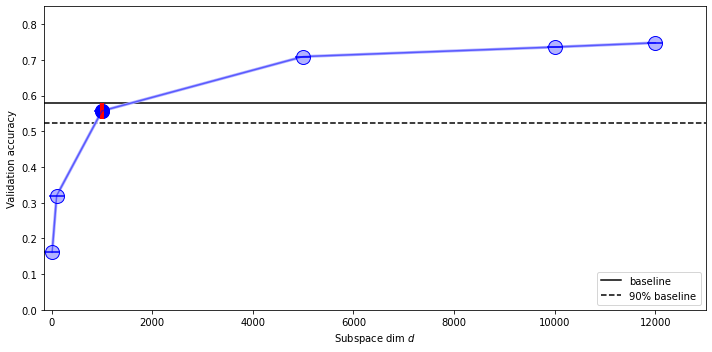

In [51]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_resnet_cifar, baseline=BASELINE_RESNET)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE_RESNET, logx=False,xlim_v=[-150,13000], ylim_v=[0,0.85], saveas='')

## ResNet - Local Baseline

[[100, 0.3198], [1000, 0.5571], [0, 0.825], [10, 0.1609], [10000, 0.7361], [0, 0.7564], [100, 0.0592], [0, 0.6567], [12000, 0.748], [5000, 0.7094]]
(10, 2)
[0.0, 10.0, 100.0, 1000.0, 5000.0, 10000.0, 12000.0]
(7, 100, 2)
[12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.
 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000. 12000.]
d_int: mean=12000.0, std=0.0
d_int: mean=0.7480000000000002, std=2.2

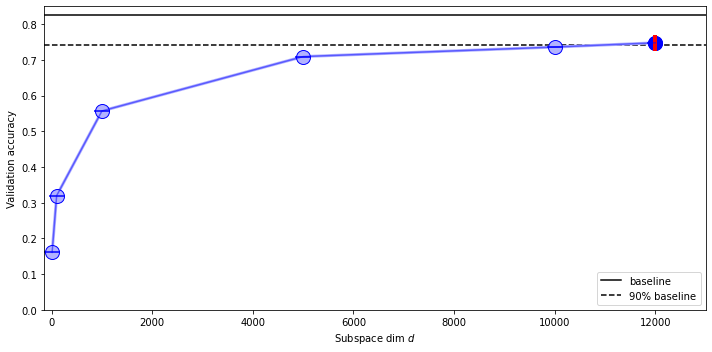

In [52]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_resnet_cifar, baseline=acc_mean[0])
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, logx=False,xlim_v=[-150,13000], ylim_v=[0,0.85], saveas='')

## ResNet - FastJL

In [53]:
with open('results/resnet/results_resnet_cifar10.json') as f:
    data = json.load(f)
f.close()

data_resnet_fastjl_cifar = [] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    if "fastJL" in k or v['intrinsic_dimension'] == 0:
        data_resnet_fastjl_cifar.append([v['intrinsic_dimension'],v['best_accuracy']])

[[0, 0.825], [0, 0.7564], [0, 0.6567], [10000, 0.3644], [1000, 0.1457], [20000, 0.209], [25000, 0.2066], [10, 0.1394], [100, 0.1846], [7000, 0.375], [15000, 0.2084]]
(11, 2)
[0.0, 10.0, 100.0, 1000.0, 7000.0, 10000.0, 15000.0, 20000.0, 25000.0]
(9, 100, 2)
[25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.
 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000. 25000.]
d_int: mean=25000.0, std=0.0
d_i

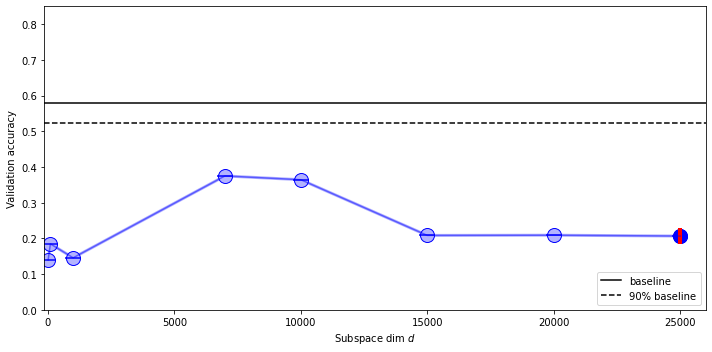

In [79]:
unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean, dim_solved_std = format_data(data_resnet_fastjl_cifar, baseline=BASELINE_RESNET)
plot_perf_with_std(unique_dim, acc_mean, acc_std, acc_solved_mean, acc_solved_std, dim_solved_mean,dim_solved_std, baseline=BASELINE_RESNET, logx=False,xlim_v=[-150,26000], ylim_v=[0,0.85], saveas='')

In [55]:
import pandas as pd

with open('results/fcn/results_fcn_mnist.json') as f:
    data = json.load(f)
f.close()

df = pd.DataFrame.from_dict(data).transpose()
df

,number_parameter,hidden_dimension,number_layers,intrinsic_dimension,epoch,validation_accuracy,learning_rate,best_epoch,best_accuracy
fcn_model_h50_id50_lay0_lr0.05,39760.0,50.0,0.0,50.0,100.0,0.4479,0.050,58.0,0.4623
fcn_model_h50_id50_lay0_lr0.02,39760.0,50.0,0.0,50.0,100.0,0.4529,0.020,1.0,0.4636
fcn_model_h50_id50_lay0_lr0.01,39760.0,50.0,0.0,50.0,100.0,0.4561,0.010,4.0,0.4627
fcn_model_h50_id50_lay0_lr0.005,39760.0,50.0,0.0,50.0,100.0,0.4565,0.005,8.0,0.4642
fcn_model_h50_id50_lay0_lr0.001,39760.0,50.0,0.0,50.0,100.0,0.4585,0.001,44.0,0.4653
...,...,...,...,...,...,...,...,...,...
fcn_model_h200_id0_lay1_lr0.1_proj_dense_opt_sgd,199210.0,200.0,1.0,0.0,100.0,0.9814,0.100,80.0,0.9817
fcn_model_h200_id50_lay1_lr0.05_proj_dense_opt_sgd,199210.0,200.0,1.0,50.0,100.0,0.4695,0.050,29.0,0.4863
fcn_model_h200_id10_lay1_lr0.01_proj_dense_opt_sgd,199210.0,200.0,1.0,10.0,100.0,0.2169,0.010,27.0,0.2289
fcn_model_h200_id100_lay1_lr0.01_proj_sparse_opt_sgd,199210.0,200.0,1.0,100.0,100.0,0.6434,0.010,61.0,0.6528


In [56]:
import plotly.express as px
fig = px.scatter_matrix(df,
    dimensions=["number_parameter", "hidden_dimension", "number_layers", "learning_rate", "best_accuracy"],
    color="intrinsic_dimension",)
fig.update_layout(
    dragmode='select',
    height=1000,
    hovermode='closest',
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [57]:
import plotly.graph_objects as go

sizeref = max(df["hidden_dimension"])/(30**2)

fig = go.Figure()

fig.add_trace(go.Scatter(
    y=df["learning_rate"],
    x=df["best_accuracy"],
    mode='markers',
    marker=dict(
        color=df["intrinsic_dimension"], size=df["hidden_dimension"],
        sizemode = 'area', sizeref=sizeref,
        sizemin=2, showscale = True
        ),
))
fig.update_yaxes(type="log")
fig.show()

In [58]:
sizeref = max(df['hidden_dimension'])/(30**2)

fig = go.Figure()

fig.add_trace(go.Scatter3d(
    x=df['number_parameter'],
    y=df['intrinsic_dimension'],
    z=df['best_accuracy'],
    mode='markers',
    marker=dict(
        color=df['learning_rate'], size=df['hidden_dimension'],
        sizemode = 'area', sizeref=sizeref,
        sizemin=2, showscale = True
        ),
#    error_y=dict(
#            type='data', # value of error bar given in data coordinates
#            array=[1, 2, 3, 4, 5],
#            visible=True),
))

fig.update_layout(
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=0.01,
        )
    )

fig.show()

In [59]:
def compute_d_int(name, dat, perf_b=None):
    dir_perf = np.mean(dat[dat[:,0]==0,:],0)[1]
    sub_perf = dat[dat[:,0]!=0,:]
    
    unique_dim = sorted(list(set(sub_perf[:,0])))
    perf_mean = [np.mean(dat[dat[:,0]==d,:],0)[1] for d in unique_dim]
    
    if perf_b!=None:
        dir_perf = perf_b
        
    for i in range(len(unique_dim)):
        if perf_mean[i]>dir_perf*.90:
            print(str(name)+" d_int="+str(unique_dim[i]) + ", acc=" +str( perf_mean[i] )) 
            solved = array([unique_dim[i], perf_mean[i]])
            break
        elif perf_mean[-1]<dir_perf*.90:
            solved = array([unique_dim[-1], perf_mean[-1]])
            print(str(name)+" d_int="+str(unique_dim[-1]) + ", acc=" +str( perf_mean[-1] ) + "(Warning: larger d should be considered)")
            break
        
    return solved, unique_dim, perf_mean

In [60]:
def plot_convnet_ff(dat_lenet, dat_lenet_untied, dat_lenet_mlp,dat_lenet_fctie,  perf_b=1.0, logx=True, limit=None, saveas=None):
    
    plotfn = semilogx if logx else plot
    leg = OrderedDict()
    
    axhline(perf_b, color=(.7,.7,.7), ls='-')
    hhd = axhline(.9 * perf_b, color=(.7,.7,.7), ls='--')

    solved, unique_dim, perf_mean = compute_d_int("LeNet", dat_lenet, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='k',  mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='k', ms=15)
    leg[hh] = 'LeNet'

    solved, unique_dim, perf_mean = compute_d_int("Untied LeNet", dat_lenet_untied, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='g', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='g', ms=15)    
    leg[hh] = 'Untied LeNet'

    solved, unique_dim, perf_mean = compute_d_int("FC LeNet", dat_lenet_mlp, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='r', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o', color='r', ms=15)
    leg[hh] = 'FC LeNet'    

    solved, unique_dim, perf_mean = compute_d_int("FCTied LeNet",dat_lenet_fctie, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='b', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o', color='b', ms=15)
    leg[hh] = 'FCTied LeNet'


    
    leg[hhd] = 'threshold'

    xlabel('Intrinsic dim $d$')
    ylabel('Validation accuracy')
    ax = axis()
    tight_layout()
    if limit.any() != None:
        axis([limit[0], limit[1], limit[2], limit[3]])
    legend(leg.keys(), leg.values(),loc=4)
    #legend?
    
    #if saveas:
    #    savefig('%s.png' % saveas)
    #    savefig('%s.pdf' % saveas)    
    

In [61]:
with open('results/fc_lenet/results_fc_lenet_mnist_dense.json') as f:
    data = json.load(f)
f.close()

data_fc_lenet_dense = [[0,100]] # 0 is the dimension of the full space and 100 is the global baseline accuracy (100%)
for k,v in data.items():
    data_fc_lenet_dense.append([v['intrinsic_dimension'],v['best_accuracy']])

In [62]:
def plot_convnet_ff(dat_lenet, dat_lenet_untied, perf_b=1.0, logx=True, limit=None, saveas=None):
    
    plotfn = semilogx if logx else plot
    leg = OrderedDict()
    
    axhline(perf_b, color=(.7,.7,.7), ls='-')
    hhd = axhline(.9 * perf_b, color=(.7,.7,.7), ls='--')

    solved, unique_dim, perf_mean = compute_d_int(dat_lenet, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='k',  mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='k', ms=15)
    leg[hh] = 'Fc LeNet Dense'
    
    solved, unique_dim, perf_mean = compute_d_int(dat_lenet_untied, perf_b)
    hh, = plotfn(unique_dim, perf_mean, 'o-', color='g', mfc=(.7,.7,1), ms=14)
    plotfn(solved[0], solved[1], 'o-', color='g', ms=15)    
    leg[hh] = 'Fc LeNet Fastfood' 

    leg[hhd] = 'threshold'

    xlabel('Intrinsic dim $d$')
    ylabel('Validation accuracy')
    ax = axis()
    tight_layout()
    if limit.any() != None:
        axis([limit[0], limit[1], limit[2], limit[3]])
    legend(leg.keys(), leg.values(),loc=4)

In [63]:
print("Individual Baseline:")
compute_d_int(data_fc_lenet_dense, perf_b=None)
compute_d_int(data_fc_lenet, perf_b=None)

print("Global Baseline:")
perf_b = 1.0
plot_convnet_ff(data_fc_lenet_dense, data_fc_lenet, perf_b, logx=True, limit=np.array([50,10000,0.4,1.0]))

Individual Baseline:


TypeError: compute_d_int() missing 1 required positional argument: 'dat'

In [ ]:
data_fcn200.sort()
print(data_fcn200)
int_dim_fcn200 = [k for k,v in data_fcn200]
acc_fcn200 = [v for k,v in data_fcn200]

[[0, 0.9817], [10, 0.2289], [50, 0.4863], [100, 0.5833], [200, 0.7451], [300, 0.8231], [400, 0.8636], [500, 0.8832], [525, 0.8862], [550, 0.889], [575, 0.8935], [600, 0.902], [625, 0.8982], [650, 0.8973], [675, 0.9002], [700, 0.9004], [800, 0.9137], [900, 0.9239], [1000, 0.9282], [1100, 0.9286], [1200, 0.9339], [1300, 0.9346]]


In [ ]:
data_lenet_mnist.sort()
print(data_lenet_mnist)
int_dim_lenet = [k for k,v in data_lenet_mnist]
acc_lenet = [v for k,v in data_lenet_mnist]

[[0, 0.9892], [10, 0.2362], [50, 0.6189], [100, 0.811], [125, 0.8486], [150, 0.8792], [160, 0.8903], [165, 0.8901], [170, 0.9028], [175, 0.901], [180, 0.8931], [185, 0.8953], [190, 0.8937], [195, 0.9106], [200, 0.9228], [205, 0.9057], [210, 0.9075], [225, 0.9295], [250, 0.9281], [275, 0.9351], [300, 0.9387], [400, 0.9523], [500, 0.9656], [1000, 0.9764]]


In [ ]:
data_untied_lenet.sort()
print(data_untied_lenet)
int_dim_untied_lenet = [k for k,v in data_untied_lenet]
acc_untied_lenet = [v for k,v in data_untied_lenet]

[[0, 0.9868], [10, 0.1758], [50, 0.527], [100, 0.7273], [200, 0.8412], [300, 0.8769], [350, 0.9003], [400, 0.9077], [450, 0.9142], [500, 0.916], [600, 0.9303], [700, 0.9376], [800, 0.9387], [900, 0.9431], [1000, 0.9463], [1100, 0.9524], [1200, 0.9498], [1300, 0.9563]]


In [ ]:
data_fc_lenet.sort()
print(data_fc_lenet)
int_dim_fc_lenet = [k for k,v in data_fc_lenet]
acc_fc_lenet = [v for k,v in data_fc_lenet]

[[0, 0.9772], [10, 0.114], [50, 0.1135], [100, 0.1823], [200, 0.4067], [250, 0.6846], [300, 0.7605], [400, 0.8323], [600, 0.8781], [800, 0.8815], [900, 0.9049], [1000, 0.9037], [1100, 0.9042], [1200, 0.9116], [1400, 0.9159]]


In [ ]:
data_fc_tied_lenet.sort()
print(data_fc_tied_lenet)
int_dim_fc_tied_lenet = [k for k,v in data_fc_tied_lenet]
acc_fc_tied_lenet = [v for k,v in data_fc_tied_lenet]

[[0, 0.989], [10, 0.2285], [50, 0.5198], [100, 0.6856], [200, 0.8362], [300, 0.882], [400, 0.9036], [500, 0.9207], [600, 0.9348], [700, 0.9375], [800, 0.9456], [900, 0.9476], [1000, 0.9516], [1100, 0.9563], [1200, 0.9565], [1300, 0.9578], [1400, 0.9606]]


In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=int_dim_fcn200[1:], y=acc_fcn200[1:], mode='lines+markers', name = 'FCN',
                         line=dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x=int_dim_lenet[1:], y=acc_lenet[1:], mode='lines+markers', name = 'LeNet',
                         line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=int_dim_untied_lenet[1:], y=acc_untied_lenet[1:], mode='lines+markers', name = 'Untied LeNet',
                         line=dict(color='green', width=1)))
fig.add_trace(go.Scatter(x=int_dim_fc_lenet[1:], y=acc_fc_lenet[1:], mode='lines+markers', name = 'FC LeNet',
                         line=dict(color='black', width=1)))
fig.add_trace(go.Scatter(x=int_dim_fc_tied_lenet[1:], y=acc_fc_tied_lenet[1:], mode='lines+markers', name = 'FC Tied LeNet',
                         line=dict(color='purple', width=1)))
fig.add_trace(go.Scatter(x=[-100, 1500], y=[0.9, 0.9], mode='lines', name = 'Threshold', line=dict(color='black', width=2, dash='dot')))
fig.update_layout(
    title="Intrinsic Dimension MNIST",
    )

Individual Baseline:
LeNet d_int=160.0, acc=0.8903
Untied LeNet d_int=350.0, acc=0.9003
FC LeNet d_int=800.0, acc=0.8815
FC Tied LeNet d_int=400.0, acc=0.9036
Global Baseline:
LeNet d_int=170.0, acc=0.9028
Untied LeNet d_int=350.0, acc=0.9003
FC LeNet d_int=900.0, acc=0.9049
FCTied LeNet d_int=400.0, acc=0.9036


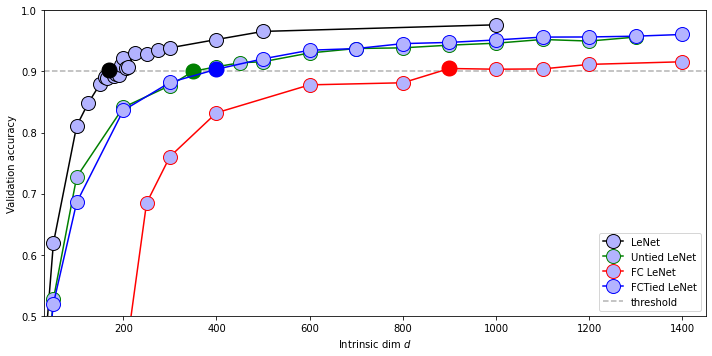

In [ ]:
print("Individual Baseline:")
data_lenet_mnist = np.array(data_lenet_mnist)
data_untied_lenet = np.array(data_untied_lenet)
data_fc_lenet = np.array(data_fc_lenet)
data_fc_tied_lenet = np.array(data_fc_tied_lenet)

compute_d_int("LeNet", data_lenet_mnist, perf_b=None)
compute_d_int("Untied LeNet", data_untied_lenet, perf_b=None)
compute_d_int("FC LeNet", data_fc_lenet, perf_b=None)
compute_d_int("FC Tied LeNet", data_fc_tied_lenet, perf_b=None)

print("Global Baseline:")
perf_b = 1.0
plot_convnet_ff(data_lenet_mnist, data_untied_lenet, data_fc_lenet, data_fc_tied_lenet, perf_b, logx=False, limit=np.array([30,1450,0.5,1.0]), saveas='mnist_lenet_variants')

In [ ]:
data_fcn_cifar10.sort()
print(data_fcn_cifar10)
int_dim_fcn_cifar10 = [k for k,v in data_fcn_cifar10 if k != 0]
acc_fcn_cifar10 = [v for k,v in data_fcn_cifar10 if k != 0]

[[0, 0.5256], [10, 0.0707], [10, 0.1242], [100, 0.0707], [100, 0.2673], [200, 0.3046], [250, 0.3318], [500, 0.3691], [500, 0.3716], [750, 0.3967], [1000, 0.4058], [1000, 0.4063], [1500, 0.4283], [1500, 0.43], [2000, 0.4389], [2000, 0.4438], [2500, 0.4454], [3000, 0.4574], [4000, 0.4733], [5000, 0.4642], [5000, 0.4747], [6000, 0.477], [6250, 0.485], [6500, 0.4859], [6750, 0.4807], [7000, 0.4866], [7500, 0.4838], [8000, 0.488], [8500, 0.4872], [9000, 0.4894], [9500, 0.4837], [10000, 0.483], [10000, 0.4892], [12000, 0.4969], [20000, 0.4997], [50000, 0.5004]]


In [ ]:
data_lenet_cifar.sort()
print(data_lenet_cifar)
int_dim_lenet_cifar10 = [k for k,v in data_lenet_cifar if k != 0]
acc_lenet_cifar10 = [v for k,v in data_lenet_cifar if k != 0]

[[0, 0.5725], [10, 0.1003], [10, 0.1024], [50, 0.239], [100, 0.1003], [100, 0.2909], [200, 0.1463], [200, 0.3607], [300, 0.3868], [400, 0.4212], [500, 0.4048], [500, 0.4295], [600, 0.451], [700, 0.4562], [750, 0.426], [800, 0.4578], [900, 0.4694], [1000, 0.4406], [1000, 0.4733], [1100, 0.4861], [1200, 0.5069], [1300, 0.4913], [1400, 0.499], [1500, 0.4889], [1500, 0.5073], [1600, 0.5103], [1700, 0.518], [1800, 0.4972], [1900, 0.503], [2000, 0.492], [2000, 0.5155], [2100, 0.5364], [2200, 0.5193], [2300, 0.5331], [2400, 0.5207], [2500, 0.5028], [2500, 0.5252], [2600, 0.5418], [2700, 0.5325], [2800, 0.5316], [2900, 0.5414], [3000, 0.551], [3100, 0.5355], [3200, 0.5499], [3300, 0.5409], [3400, 0.5276], [3500, 0.5289], [3600, 0.5488], [3700, 0.5599], [3800, 0.5539], [3900, 0.544], [4000, 0.5425], [4100, 0.5562], [4200, 0.5434], [4300, 0.5518], [4400, 0.5578], [4500, 0.5553]]


In [ ]:
data_untied_lenet_cifar.sort()
print(data_untied_lenet_cifar)
int_dim_untied_lenet_cifar10 = [k for k,v in data_untied_lenet_cifar if k != 0]
acc_untied_lenet_cifar10 = [v for k,v in data_untied_lenet_cifar if k != 0]

[[0, 0.1], [0, 0.5984], [10, 0.1], [100, 0.1], [100, 0.1], [500, 0.1], [500, 0.1564], [1000, 0.1], [1000, 0.4163], [2000, 0.1], [2000, 0.455], [5000, 0.4042], [5000, 0.5023], [7000, 0.4251], [10000, 0.4639], [10000, 0.5249], [12500, 0.48], [15000, 0.4827], [20000, 0.5], [20000, 0.5399], [25000, 0.5022], [30000, 0.5068], [35000, 0.5198], [35000, 0.5575], [40000, 0.5178], [50000, 0.5544]]


In [ ]:
data_fc_lenet_cifar.sort()
print(data_fc_lenet_cifar)
int_dim_fc_lenet_cifar10 = [k for k,v in data_fc_lenet_cifar if k != 0]
acc_fc_lenet_cifar10 = [v for k,v in data_fc_lenet_cifar if k != 0]

[[0, 0.5516], [10, 0.1165], [100, 0.1], [500, 0.3628], [500, 0.3732], [1000, 0.3966], [1000, 0.4018], [2000, 0.4163], [2000, 0.4221], [5000, 0.4423], [5000, 0.4513], [10000, 0.4522], [15000, 0.4891], [20000, 0.4704], [27000, 0.5005], [30000, 0.5024], [35000, 0.4764], [35000, 0.5006], [45000, 0.5069], [50000, 0.4822], [50000, 0.5127], [55000, 0.5106], [70000, 0.516]]


In [ ]:
data_fc_tied_lenet_cifar
data_fc_tied_lenet_cifar.sort()
print(data_fc_tied_lenet_cifar)
int_dim_fc_tied_lenet_cifar10 = [k for k,v in data_fc_tied_lenet_cifar if k != 0]
acc_fc_tied_lenet_cifar10 = [v for k,v in data_fc_tied_lenet_cifar if k != 0]

[[0, 0.505], [0, 0.562], [10, 0.1], [10, 0.1408], [10, 0.1503], [100, 0.1], [100, 0.1513], [100, 0.2674], [500, 0.1], [500, 0.3559], [500, 0.3736], [1000, 0.1005], [1000, 0.4072], [1000, 0.42], [2000, 0.1479], [2000, 0.4441], [2000, 0.4507], [3000, 0.4591], [4000, 0.4723], [4000, 0.4775], [5000, 0.1802], [5000, 0.4928], [6000, 0.5027], [7000, 0.5019], [8000, 0.1932], [8000, 0.5094], [9000, 0.5127], [10000, 0.196], [10000, 0.5197], [11000, 0.1974], [11000, 0.5214], [12000, 0.188], [12000, 0.5226], [15000, 0.4736], [15000, 0.5346], [20000, 0.2069]]


In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=int_dim_fcn_cifar10, y=acc_fcn_cifar10, mode='lines+markers', name = 'FCN',
                         line=dict(color='firebrick', width=1)))
fig.add_trace(go.Scatter(x=int_dim_lenet_cifar10, y=acc_lenet_cifar10, mode='lines+markers', name = 'LeNet',
                         line=dict(color='blue', width=1)))
fig.add_trace(go.Scatter(x=int_dim_untied_lenet_cifar10, y=acc_untied_lenet_cifar10, mode='lines+markers', name = 'Untied LeNet',
                         line=dict(color='green', width=1)))
fig.add_trace(go.Scatter(x=int_dim_fc_lenet_cifar10, y=acc_fc_lenet_cifar10, mode='lines+markers', name = 'FC LeNet',
                         line=dict(color='black', width=1)))
fig.add_trace(go.Scatter(x=int_dim_fc_tied_lenet_cifar10, y=acc_fc_tied_lenet_cifar10, mode='lines+markers', name = 'FC Tied LeNet',
                         line=dict(color='purple', width=1)))
fig.add_trace(go.Scatter(x=[0, 70000], y=[0.52, 0.52], mode='lines', name = 'Threshold', line=dict(color='black', width=2, dash='dot')))
fig.update_layout(
    title="Intrinsic Dimension Cifar10",
    )